# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

In [4]:
temp = []
humid = []
cloudy = []
windy = []
lats =[]
longs = []
cities_used = []


print("Firing up.....")
print("------------------------------")
recnum = 0

for city in cities:
    recnum = recnum + 1
    print(f"Loading results for city #{recnum}, {city}.")
    response = requests.get(query_url + city).json()
    try:
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        windy.append(response['wind']['speed'])
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        print(f"Data added for {city}.")
        cities_used.append(city)
    except:
        print(f"No record found for {city}, moving on...")

Firing up.....
------------------------------
Loading results for city #1, fairbanks.
Data added for fairbanks.
Loading results for city #2, butaritari.
Data added for butaritari.
Loading results for city #3, grande-riviere.
No record found for grande-riviere, moving on...
Loading results for city #4, pak phanang.
Data added for pak phanang.
Loading results for city #5, monte santo.
Data added for monte santo.
Loading results for city #6, busselton.
Data added for busselton.
Loading results for city #7, qaqortoq.
Data added for qaqortoq.
Loading results for city #8, hermanus.
Data added for hermanus.
Loading results for city #9, yagodnoye.
Data added for yagodnoye.
Loading results for city #10, atuona.
Data added for atuona.
Loading results for city #11, bethel.
Data added for bethel.
Loading results for city #12, tuatapere.
Data added for tuatapere.
Loading results for city #13, lavrentiya.
Data added for lavrentiya.
Loading results for city #14, ankang.
Data added for ankang.
Loading

Data added for lerwick.
Loading results for city #122, comodoro rivadavia.
Data added for comodoro rivadavia.
Loading results for city #123, mys shmidta.
No record found for mys shmidta, moving on...
Loading results for city #124, bengkulu.
Data added for bengkulu.
Loading results for city #125, vaitupu.
No record found for vaitupu, moving on...
Loading results for city #126, lata.
Data added for lata.
Loading results for city #127, avarua.
Data added for avarua.
Loading results for city #128, torbay.
Data added for torbay.
Loading results for city #129, coihaique.
Data added for coihaique.
Loading results for city #130, grand river south east.
No record found for grand river south east, moving on...
Loading results for city #131, carthage.
Data added for carthage.
Loading results for city #132, zhanatas.
No record found for zhanatas, moving on...
Loading results for city #133, svobodnyy.
Data added for svobodnyy.
Loading results for city #134, havelock.
Data added for havelock.
Loadin

Data added for chicama.
Loading results for city #240, paka.
Data added for paka.
Loading results for city #241, novomalorossiyskaya.
Data added for novomalorossiyskaya.
Loading results for city #242, plettenberg bay.
Data added for plettenberg bay.
Loading results for city #243, cherskiy.
Data added for cherskiy.
Loading results for city #244, strezhevoy.
Data added for strezhevoy.
Loading results for city #245, maceio.
Data added for maceio.
Loading results for city #246, dalvik.
Data added for dalvik.
Loading results for city #247, blagoyevo.
Data added for blagoyevo.
Loading results for city #248, namibe.
Data added for namibe.
Loading results for city #249, taoudenni.
Data added for taoudenni.
Loading results for city #250, amderma.
No record found for amderma, moving on...
Loading results for city #251, vinh.
Data added for vinh.
Loading results for city #252, souillac.
Data added for souillac.
Loading results for city #253, saldanha.
Data added for saldanha.
Loading results for 

Data added for husavik.
Loading results for city #360, hammerfest.
Data added for hammerfest.
Loading results for city #361, sibu.
Data added for sibu.
Loading results for city #362, warqla.
No record found for warqla, moving on...
Loading results for city #363, maun.
Data added for maun.
Loading results for city #364, koson.
Data added for koson.
Loading results for city #365, hovd.
Data added for hovd.
Loading results for city #366, la ronge.
Data added for la ronge.
Loading results for city #367, broken hill.
Data added for broken hill.
Loading results for city #368, kudahuvadhoo.
Data added for kudahuvadhoo.
Loading results for city #369, ginir.
Data added for ginir.
Loading results for city #370, karauzyak.
No record found for karauzyak, moving on...
Loading results for city #371, teluk nibung.
Data added for teluk nibung.
Loading results for city #372, barwaha.
No record found for barwaha, moving on...
Loading results for city #373, maghama.
No record found for maghama, moving on

Data added for fukuma.
Loading results for city #481, la sarre.
Data added for la sarre.
Loading results for city #482, bereda.
Data added for bereda.
Loading results for city #483, klaksvik.
Data added for klaksvik.
Loading results for city #484, magomeni.
Data added for magomeni.
Loading results for city #485, tricase.
Data added for tricase.
Loading results for city #486, nairobi.
Data added for nairobi.
Loading results for city #487, parakou.
Data added for parakou.
Loading results for city #488, sorland.
Data added for sorland.
Loading results for city #489, marau.
Data added for marau.
Loading results for city #490, sosua.
Data added for sosua.
Loading results for city #491, deputatskiy.
Data added for deputatskiy.
Loading results for city #492, mineiros.
Data added for mineiros.
Loading results for city #493, suntar.
Data added for suntar.
Loading results for city #494, formoso do araguaia.
No record found for formoso do araguaia, moving on...
Loading results for city #495, noua

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": cities_used,
    "Latitude": lats,
    "Longitude": longs,
    "Temperature": temp,
    "Humidity (%)": humid,
    "Cloudiness (%)": cloudy,
    "Wind Speed": windy
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(index=False, path_or_buf=output_data_file)
print(weather_data)

                         City  Latitude  Longitude  Temperature  Humidity (%)  \
0                   fairbanks   64.8378  -147.7164        36.48            85   
1                  butaritari    3.0707   172.7902        81.97            69   
2                 pak phanang    8.3511   100.2020        76.69            86   
3                 monte santo  -10.4378   -39.3328        78.30            43   
4                   busselton  -33.6500   115.3333        47.61            70   
..                        ...       ...        ...          ...           ...   
534                    bulgan   48.8125   103.5347        34.59            69   
535                 porangatu  -13.4408   -49.1486        84.15            49   
536                     omagh   54.6000    -7.3000        43.65            96   
537  sao gabriel da cachoeira   -0.1303   -67.0892        75.79            96   
538               san antonio   29.4241   -98.4936        89.82            26   

     Cloudiness (%)  Wind S

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_data.loc[weather_data['Humidity (%)'] > 100]

,City,Latitude,Longitude,Temperature,Humidity (%),Cloudiness (%),Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

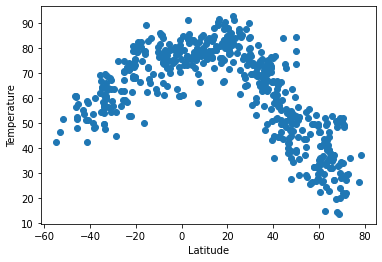

In [7]:
x_values = weather_data['Latitude']
y_values = weather_data['Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [8]:
# The code is analyzing the relationship between Latitude and Temperature. 

## Latitude vs. Humidity Plot

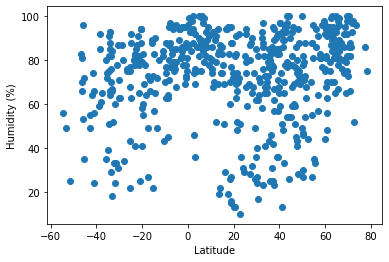

In [9]:
x_values = weather_data['Latitude']
y_values = weather_data['Humidity (%)']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

In [10]:
# The code is analyzing the relationship between Latitude and Humidity. 

## Latitude vs. Cloudiness Plot

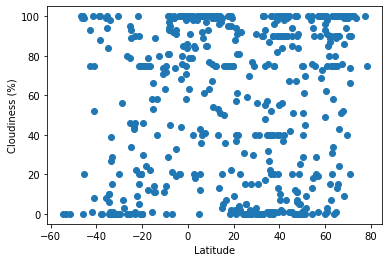

In [11]:
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness (%)']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

In [12]:
# The code is analyzing the relationship between Latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

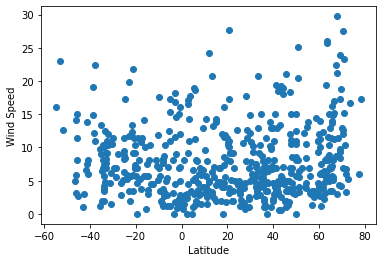

In [13]:
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [14]:
# The code is analyzing the relationship between Latitude and Wind Speed. 

## Linear Regression

In [15]:
n_weather_data = weather_data.loc[weather_data['Latitude'] > 0]
len(n_weather_data)

374

In [16]:
s_weather_data = weather_data.loc[weather_data['Latitude'] < 0]
len(s_weather_data)

165

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
from scipy import stats

y = -0.82x +91.58
The r-value is: 0.72423145100551


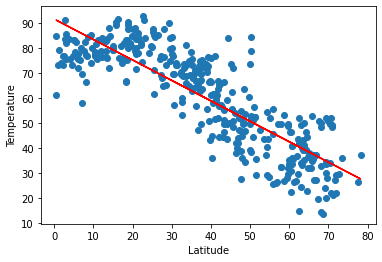

In [18]:
x_values = n_weather_data['Latitude']
y_values = n_weather_data['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature')

print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.57x +79.84
The r-value is: 0.5388664768498141


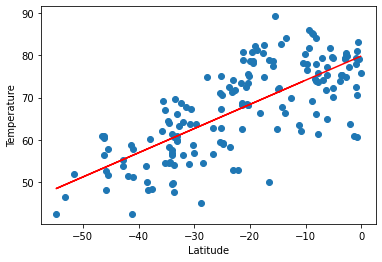

In [19]:
x_values = s_weather_data['Latitude']
y_values = s_weather_data['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature')


print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.12x +69.2
The r-value is: 0.012626008825038185


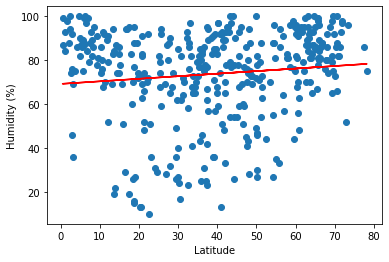

In [20]:
x_values = n_weather_data['Latitude']
y_values = n_weather_data['Humidity (%)']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.5x +81.83
The r-value is: 0.13028952080662173


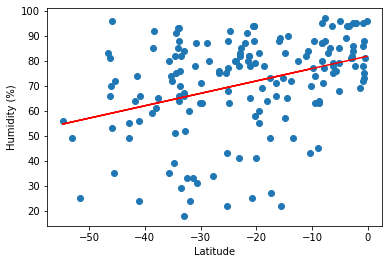

In [21]:
x_values = s_weather_data['Latitude']
y_values = s_weather_data['Humidity (%)']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.13x +53.24
The r-value is: 0.004311728328034306


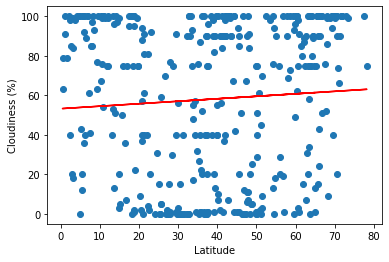

In [22]:
x_values = n_weather_data['Latitude']
y_values = n_weather_data['Cloudiness (%)']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.88x +68.09
The r-value is: 0.09466944911719333


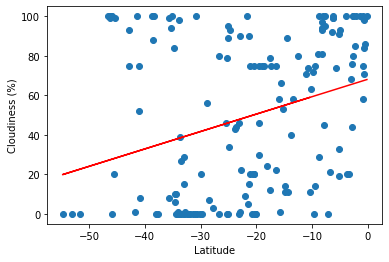

In [23]:
x_values = s_weather_data['Latitude']
y_values = s_weather_data['Cloudiness (%)']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.06x +5.55
The r-value is: 0.04222666734994239


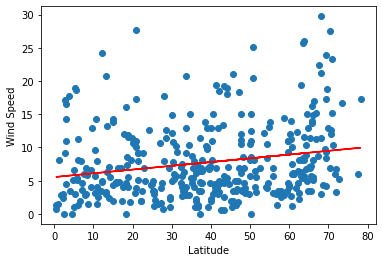

In [24]:
x_values = n_weather_data['Latitude']
y_values = n_weather_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.06x +6.6
The r-value is: 0.02994333459077391


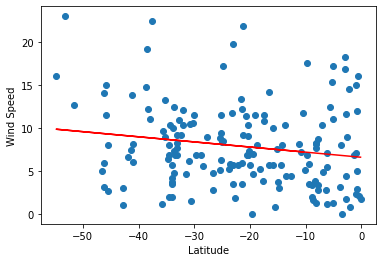

In [25]:
x_values = s_weather_data['Latitude']
y_values = s_weather_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


print(f"The r-value is: {rvalue**2}")

plt.show()